<h4>Classificación de cristales con Random Forest </h4>

In [1]:
#Importamos pandas para manipular los datasets
import pandas as pd

In [2]:
#Importamos el dataset en este caso será uno de cristales donde hay 6 cristales distintos
df = pd.read_csv("glass.csv")

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
X=df.drop('Type',axis=1)
y=df.Type

In [9]:
#Importamos las librerías para separar los datos de entrenamiento y los de test 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [30]:
#Importamos el random forest y ponemos a entrenar los datos
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
#Miramos el resultado y vemos que tiene un 80% de éxito
model.score(X_test, y_test)

0.7906976744186046

In [32]:
#Guardamos un predict
y_predicted=model.predict(X_test)

In [33]:
#Hacemos un matriz de confusión para ver los resultados
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[13,  1,  0,  0,  0,  0],
       [ 1, 14,  0,  0,  1,  0],
       [ 1,  3,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  5]], dtype=int64)

Text(69.0, 0.5, 'Realidad')

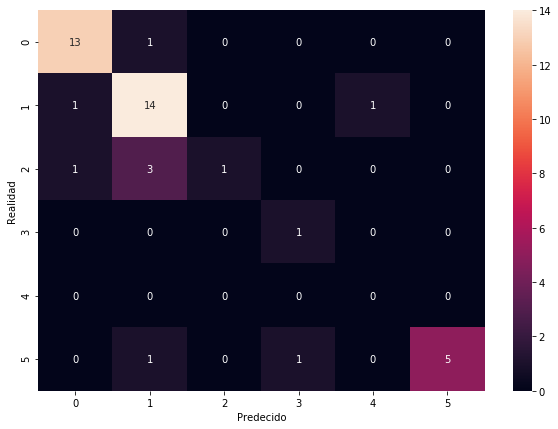

In [37]:
#Podemos ver el resultado y se asemeja bastante a la realidad, la mayoría de cristales son del tipo 1 y 2, el resto son residuales
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predecido')
plt.ylabel('Realidad')